# Importing Libraries

In [1]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from scipy.optimize import curve_fit, differential_evolution
from sklearn.metrics import r2_score

In [2]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [3]:
# Initialises data
xData = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397])

# Data that you are predicting for
xPrediction = np.array([2025, 2028])

# Codes the data to be in a more manageable range
minXData = np.min(xData)
xData -= minXData
xPrediction -= minXData



---


# Linear

In [4]:
# Defines the linear function
def linear(xData, m, c):
  return m * xData + c

MODEL_TYPE = linear

# Polynomial

In [ ]:
# Defines the polynomial function
def polynomial(xData, a, b, c):
  return a * xData ** 2 + b * xData + c

MODEL_TYPE = polynomial

# Exponential

In [ ]:
# Defines the exponential function
def exponential(xData, a, b):
  return a * b ** xData

MODEL_TYPE = exponential

# Logistic

In [8]:
def logistic(xData, k, x0):
  return L / (1 + np.exp(-k * (xData - x0)))

L = 100000
MODEL_TYPE = logistic



---


# General

In [9]:
# Defines the LAD function
def LAD(xData, yData, coeefs):
  r = MODEL_TYPE(xData, *coeefs) - yData
  return np.sum(np.abs(r))

def tanh2(xData, yData, coeefs):
  r = MODEL_TYPE(xData, *coeefs) - yData
  return np.sum(np.tanh(r / 3000) ** 2)

# Finds the parameters which yield the minimum LAD value
res = differential_evolution(lambda coeefs: LAD(xData, yData, coeefs),
      [(0, 10), (0, 50)], tol=1e-15)


# # Calculates the parameters of the model
# popt, pcov = curve_fit(MODEL_TYPE, xData, yData,
#                        bounds=([0, -np.inf], [np.inf, np.inf]))

# Creates function for the model with the found parameters
model = lambda xData: MODEL_TYPE(xData, *res.x)

print(f'Paramater Values: {res.x}')
print(f'tanh^2: {LAD(xData, yData, res.x)}')

# # Calculates the r^2 score
# rSquared = r2_score(yData, model(xData))
# print(f'R^2 value: {rSquared}')

# Uses the model to perform a prediction
yPrediction = model(xPrediction)
print(f'\nPredictions for {xPrediction + minXData} are {yPrediction}')

Paramater Values: [ 0.22432575 27.92346307]
tanh^2: 948.398322965886

Predictions for [2025 2028] are [11901.79862949 20936.0358399 ]


# Plotting Data

In [10]:
# Initialises constants
X_LABEL = "x-axis label"
Y_LABEL = "y-axis label"
LINE_LABEL = "Line Label"
LOWER_X, UPPER_X = 0, 30

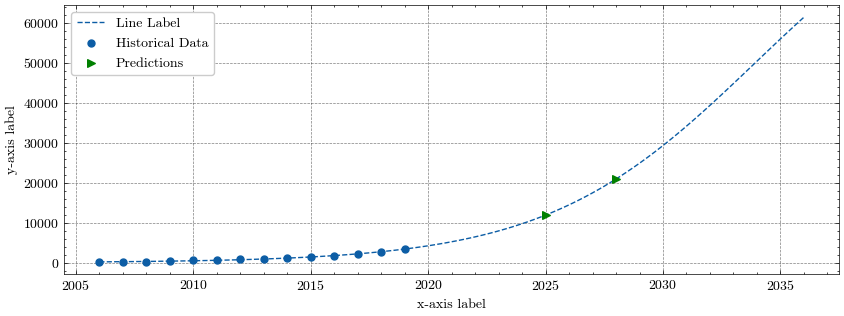

In [11]:
# Initialises settings of the graph
plt.figure(figsize=(10, 3.5))

plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

# Plots the regression
xPlot = np.linspace(LOWER_X, UPPER_X, 100)
plt.plot(xPlot + minXData, model(xPlot), linestyle='dashed', label=LINE_LABEL)

# Plots the data and prediction points
plt.scatter(xData + minXData, yData, marker="o", s=25, label="Historical Data")
plt.scatter(xPrediction + minXData, yPrediction,
            color='green', marker=">", s=30, zorder=2, label="Predictions")

plt.legend()
plt.show()

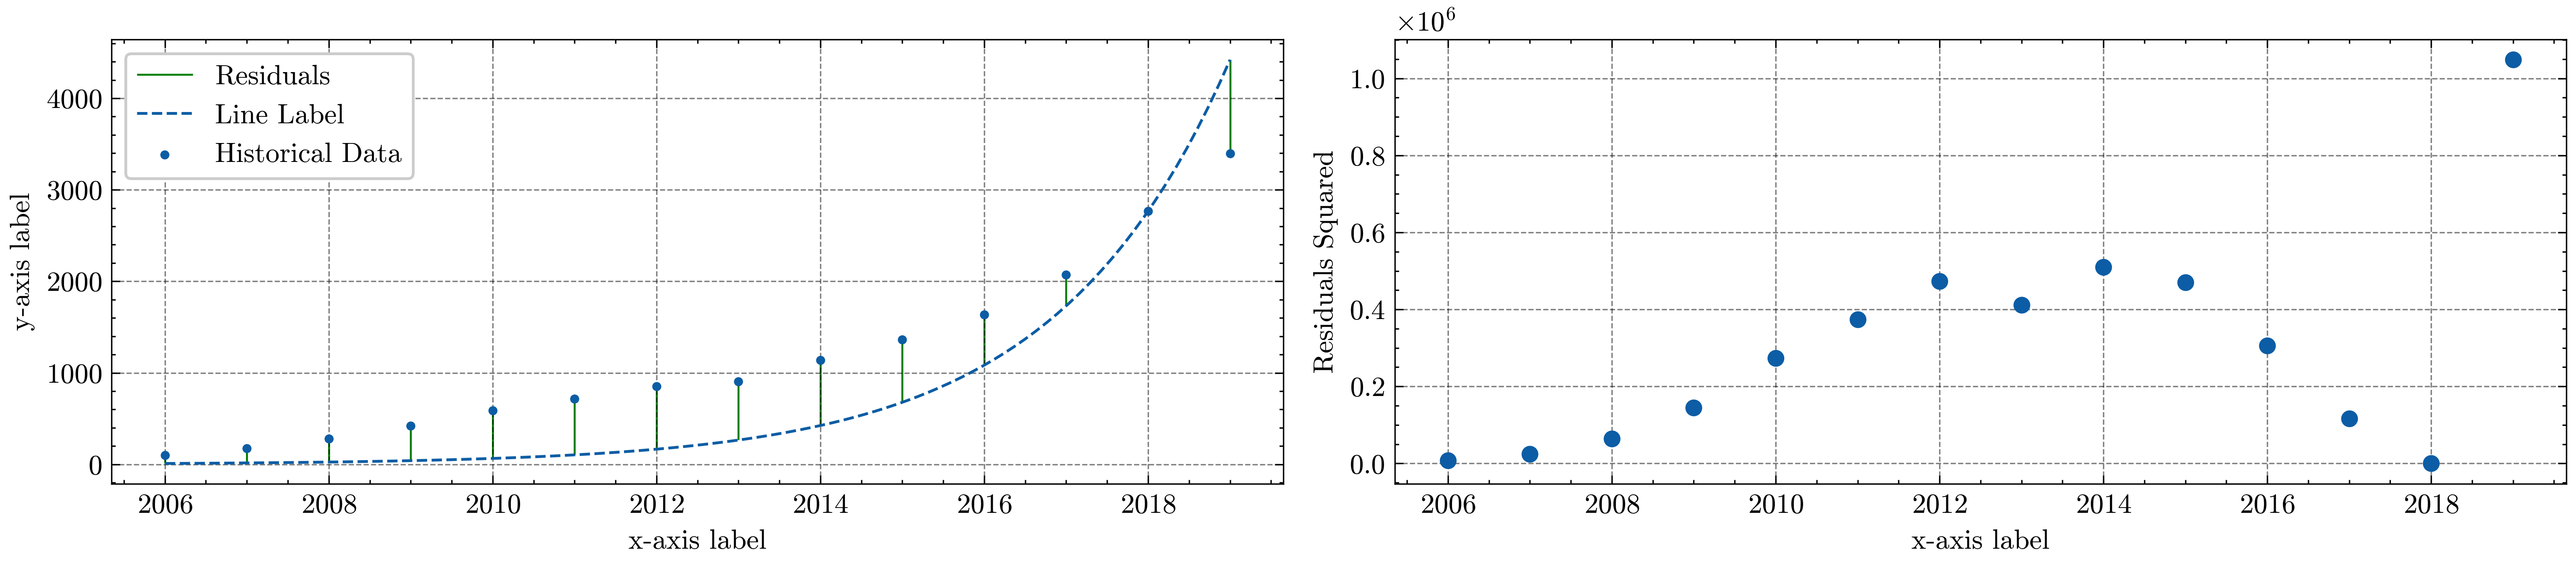

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(13,3), dpi=500)

# Creates line segments connecting the points to their prediction on the regression
segments = [[[xData[i] + minXData, yData[i]], [xData[i] + minXData, model(xData[i])]] for i in range(len(xData))]

lc = LineCollection(segments, zorder=0, color='green', label='Residuals')
lc.set_array(np.ones(len(yData)))
lc.set_linewidths(np.full(UPPER_X, 0.7))

axes[0].add_collection(lc)


# Plots the regression
xPlot = np.linspace(np.min(xData), np.max(xData), 100)
axes[0].plot(xPlot + minXData, model(xPlot), linestyle='dashed', label=LINE_LABEL)

# Plots the historical data points
axes[0].scatter(xData + minXData, yData, marker="o", s=5, label="Historical Data")

axes[0].set_xlabel(X_LABEL)
axes[0].set_ylabel(Y_LABEL)
axes[0].legend()


# Plots the residuals squared
axes[1].set_xlabel(X_LABEL)
axes[1].set_ylabel('Residuals Squared')
axes[1].scatter(xData + minXData, (yData - model(xData)) ** 2, marker="o", s=25)

fig.tight_layout()
plt.show()